<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Random Forest)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Random forest](#rf)**

**Import the required libraries**

In [4]:
# type your code here
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 
import sklearn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, classification_report,log_loss,roc_curve, roc_auc_score,cohen_kappa_score, f1_score,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm 
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#### Load the csv file

In [36]:
# type your code here
df = pd.read_csv('emp_attrition.csv')
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14


In [37]:
df.shape

(1580, 18)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your answer
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)
num.shape

(1580, 11)

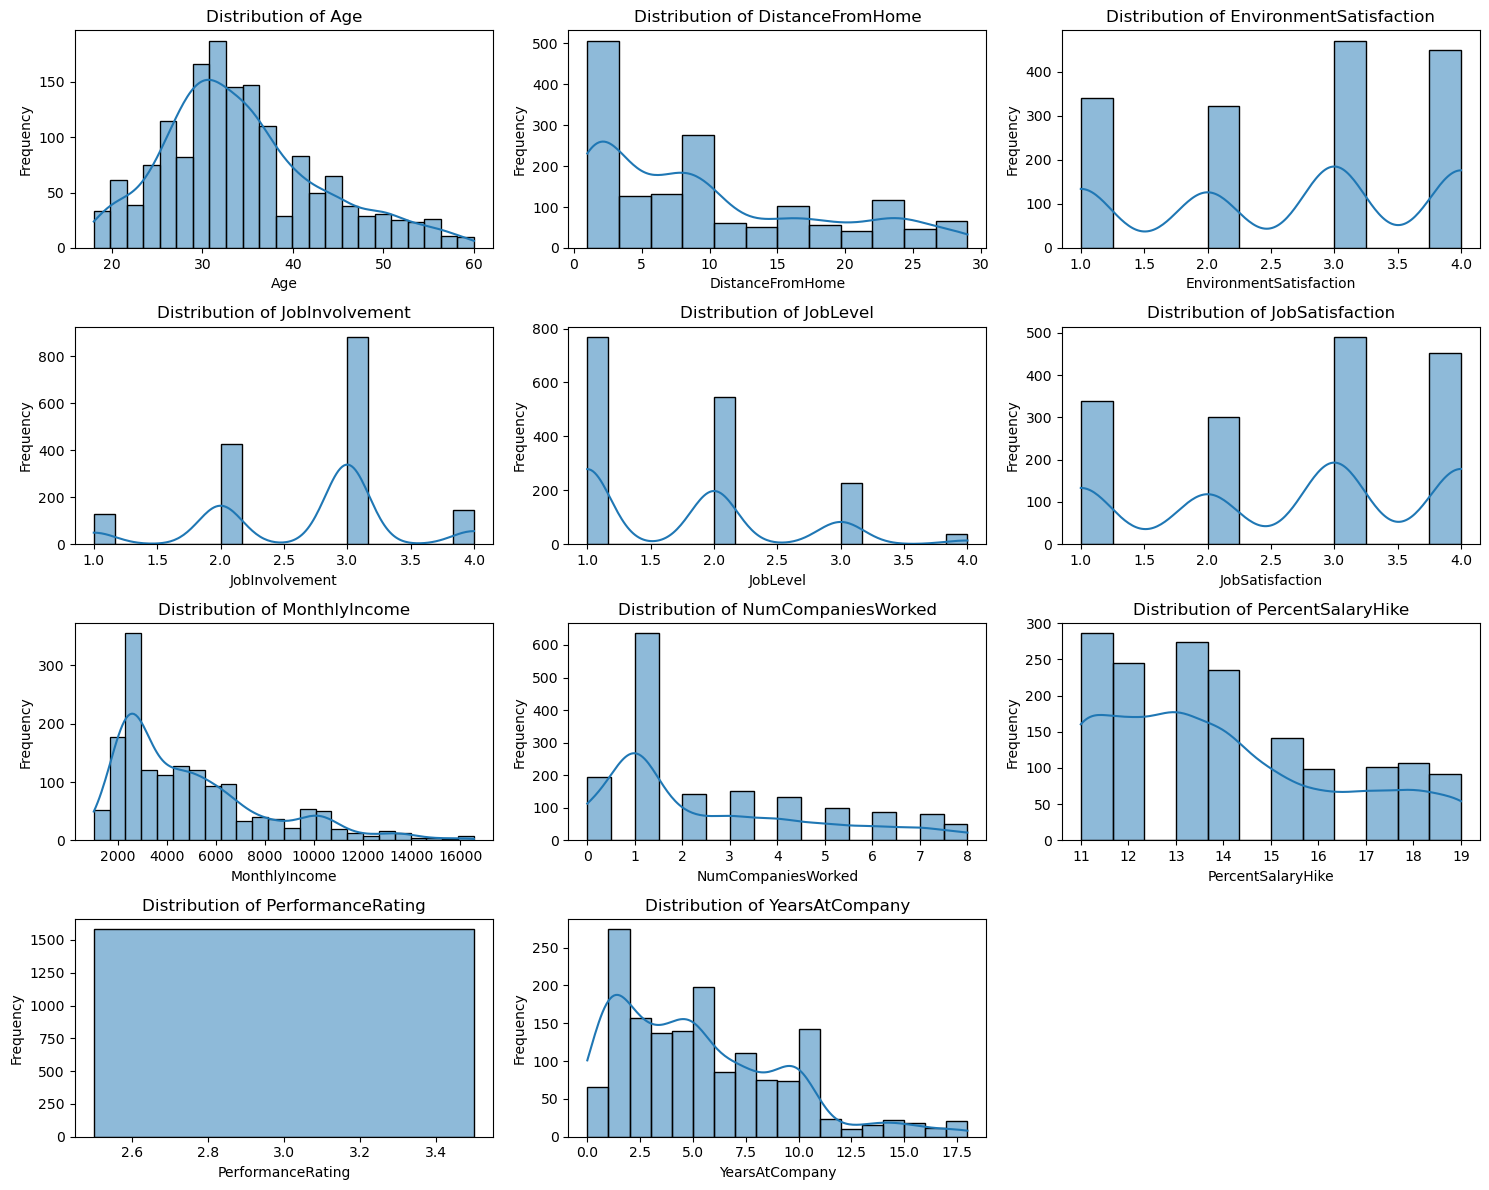

In [39]:
data = num

feature_names = data.columns

# Create subplots
plt.figure(figsize=(15, 12))

# Loop through each feature and create a Seaborn plot
for i, feature in enumerate(feature_names):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
# df = df[~((df < ll) | (df > ul))]
df = df[~((df < ll) | (df > ul))]

In [41]:
result.shape

(1580, 18)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a Random Forest model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your answer

In [107]:
df.dropna(inplace = True)
df.shape

(1487, 18)

In [110]:
y = df['Attrition']
X = df[['EnvironmentSatisfaction','MonthlyIncome']]
y = pd.get_dummies(y, drop_first=True)

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [112]:
rf = RandomForestClassifier(random_state=1)

In [113]:
model = rf.fit(X_train, y_train)

In [114]:
y_pred_test = model.predict(X_test)

In [115]:
accuracy_score(y_pred_test, y_test)

0.8859060402684564

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# type your answer

In [92]:
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)
dmy = pd.get_dummies(cat, drop_first=True)
X = pd.concat([num, dmy], axis = 1)

In [93]:
y = X['Attrition_Yes']
X = X.drop('Attrition_Yes', axis = 1)

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [95]:
rf = RandomForestClassifier(random_state=1)

In [96]:
model = rf.fit(X_train, y_train)

In [97]:
y_pred_test = model.predict(X_test)

In [98]:
accuracy_score(y_pred_test, y_test)

0.9463087248322147

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [100]:
# type your answer

In [102]:
rf = RandomForestClassifier(random_state=1)

In [103]:
tuned_para = {'criterion' : ['entropy', 'gini'],
'n_estimators' : [90, 100, 150, 200],
'max_depth' : [10, 15, 20],
'min_samples_split' : [2, 5, 8]}

In [104]:
gcv = GridSearchCV(estimator=rf, cv = 3,param_grid = tuned_para)

In [105]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [90, 100, 150, 200]})

In [106]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [116]:
# type your answer

In [206]:
# type your answer

num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)
dmy = pd.get_dummies(cat, drop_first=True)
X = pd.concat([num, dmy], axis = 1)

y = X['Attrition_Yes']
X = X.drop('Attrition_Yes', axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=1)

rf = RandomForestClassifier(random_state=1,
                           criterion= 'entropy',
                           max_depth= 20,
                           min_samples_split= 2,
                           n_estimators= 100)

model = rf.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy_score(y_pred_test, y_test)

0.9429530201342282

In [214]:
roc_auc_score(y_test, y_pred_test)

0.9430742628321807

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [207]:
# type your answer

In [208]:
top_features = pd.DataFrame({
    'features':X_test.columns,
    'values':model.feature_importances_
})

In [209]:
top_features.sort_values('values', ascending = False).head()

,features,values
6,MonthlyIncome,0.132748
0,Age,0.114311
10,YearsAtCompany,0.090065
1,DistanceFromHome,0.086442
29,OverTime_Yes,0.066705


Thus we can see that `MonthlyIncome`, `Age` and `YearsAtCompany` are the most import features when predicting whether or not an employee will leave the company.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [210]:
# type your answer

In [211]:
top10 = top_features.sort_values('values', ascending = False).head(10)

In [212]:
top10_feat = top10['features'].to_list()

In [213]:
X = X[top10_feat]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=1)

rf = RandomForestClassifier(random_state=1,
                           criterion= 'entropy',
                           max_depth= 20,
                           min_samples_split= 2,
                           n_estimators= 100)

model = rf.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy_score(y_pred_test, y_test)

0.9395973154362416

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
# type your answer

In [216]:
cm = confusion_matrix(y_test, y_pred_test)

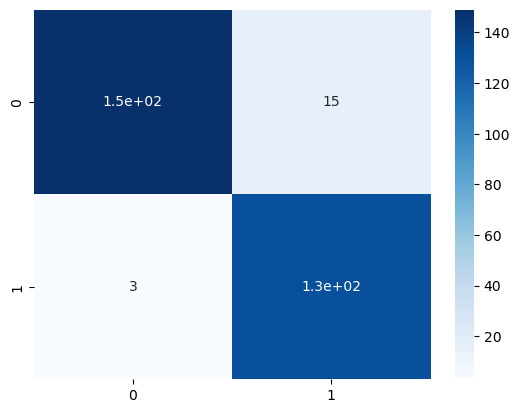

In [234]:
sns.heatmap(cm, annot= True,cmap=plt.cm.Blues)
plt.show()

In [232]:
y_pred_proba = model.predict_proba(X_test)

In [223]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])

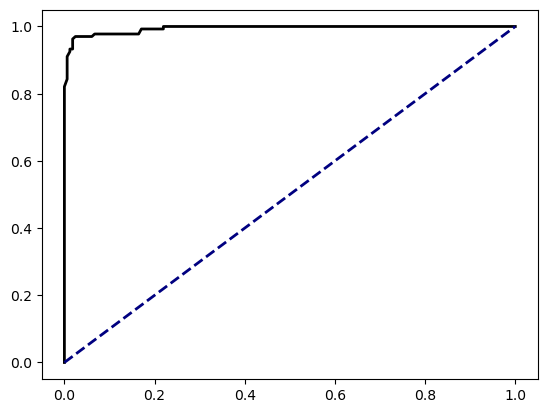

In [229]:
plt.plot(fpr, tpr, color='black', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

Confusion Matrix:
[[149  15]
 [  3 131]]
ROC-AUC Score: 0.993970695303968


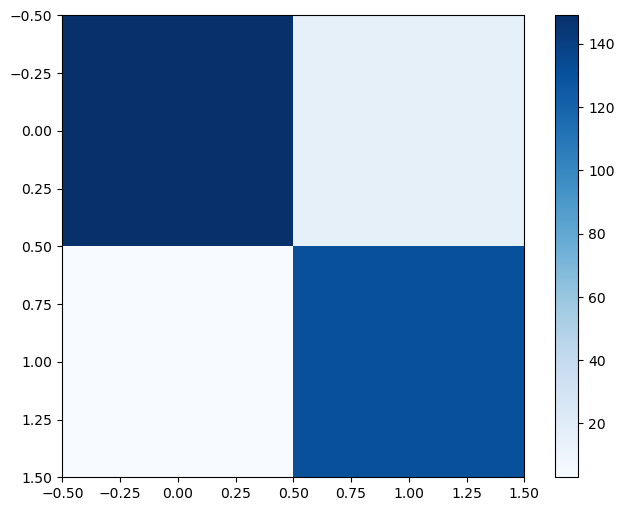

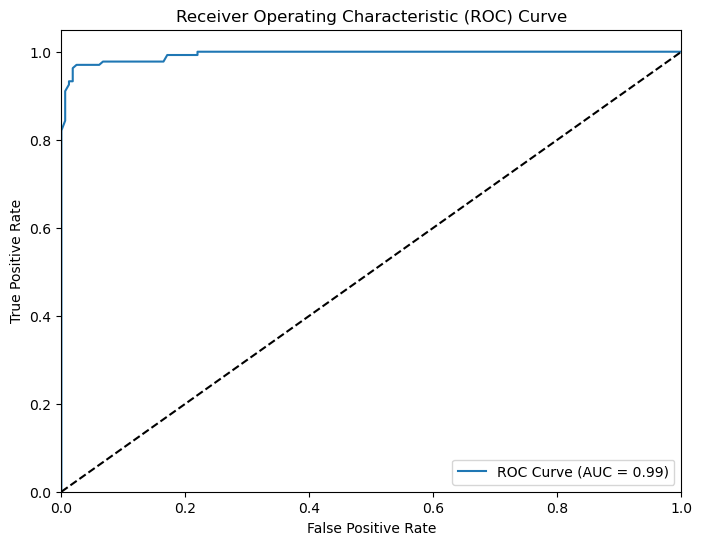

In [230]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
